Create static chloropleth maps with the number of participants for each year.

In [1]:
import pycountry
import os
import glob
import liegecolloquium
import logging
import re
from mpl_toolkits.basemap import Basemap

In [2]:
logger = logging.getLogger("participant-map")
logger.setLevel(logging.DEBUG)
logging.info("Start")

In [3]:
countryshapefile = "/home/ctroupin/Data/ShapeFiles/TM_WORLD_BORDERS_SIMPL-0.3/TM_WORLD_BORDERS_SIMPL-03.shp"
datadir = "../data/processed/"
figdir = "../figures/participants/test/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "ParticipantList-197*.tsv")))
if not os.path.exists(figdir):
    os.makedirs(figdir)

INFO:participant-map:Working on file ../data/processed/ParticipantList-1970.tsv


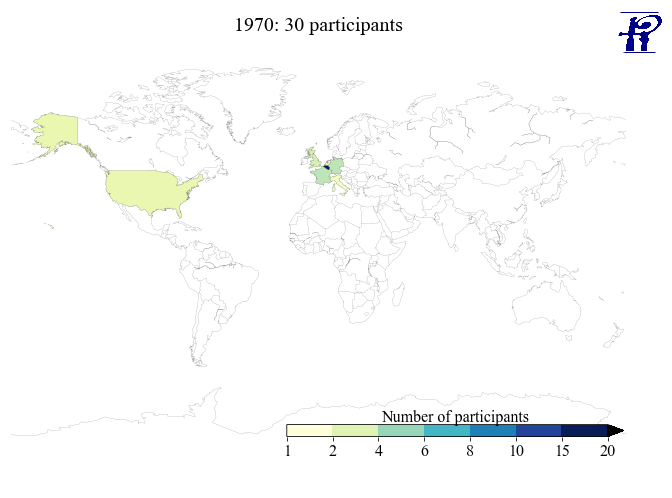

In [4]:
# Setup the projection
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

# Test with orthographic projection: not very successful!
# m = Basemap(projection='ortho',lon_0=-15,lat_0=25,resolution='l')

# Initialise a list that will contain 
# the participant countries from the beginning
country_iso_list_all = []

for datafile in datafilelist[:1]:
    logger.info("Working on file {}".format(datafile))
    
    # Get year from filename
    match = re.search(r'ParticipantList-(\d{4}).tsv', datafile)
    year = match.group(1)
    
    # Build fig name
    figname = os.path.join(figdir, "participant-map-{0}.png".format(year))

    # Get the list of iso-codes for that year
    country_iso_list = liegecolloquium.countries_from_particitant_list(datafile)
    
    # Extend the complete list (all years)
    country_iso_list_all.extend(country_iso_list)
    
    # Make a nice map out of it
    liegecolloquium.make_country_map(country_iso_list, countryshapefile, m, figname, year=year,
                                     bounds=(1, 2, 4, 6, 8, 10, 15, 20),
                                     logofile="../logos/logo_colloquium.png")

In [6]:
countryshapefile

'/home/ctroupin/Data/ShapeFiles/TM_WORLD_BORDERS_SIMPL-0.3/TM_WORLD_BORDERS_SIMPL-03.shp'

In [18]:
# Make a map with all the participants
figname = os.path.join(figdir, "participant-map-1969-2018.png")
liegecolloquium.make_country_map(country_iso_list_all, countryshapefile, m, figname, year="1969-2018",
                                     bounds=(1, 2, 4, 6, 8, 10, 15, 20),
                                     logofile="../logos/logo_colloquium.png")

ValueError: max() arg is an empty sequence

In [21]:
country_iso_list_all.extend(country_iso_list)

In [22]:
country_iso_list_all

['BE',
 'BE',
 'US',
 'BE',
 'FR',
 'BE',
 'FR',
 'GB',
 'FR',
 'BE',
 'CA',
 'BE',
 'GB',
 'NL',
 'BE',
 'GB',
 'GB',
 'CA',
 'US',
 'CA',
 'GB',
 'GB',
 'GR',
 'CA',
 'GB',
 'DE',
 'BE',
 'US',
 'BE',
 'BE',
 'BE',
 'DE',
 'FR',
 'IT',
 'BE',
 'BE',
 'DE',
 'BE',
 'BE',
 'CA',
 'DE',
 'DE',
 'BE',
 'BE',
 'FR',
 'US',
 'CA',
 'BE',
 'DE',
 'BE',
 'GB',
 'NL']